In [192]:
## Importing all the neccessary liabraries
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from termcolor import colored

In [193]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [194]:
## Loading the train dataset
data=pd.read_csv('Data file.csv')
data.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0  1           0      21408I70789  272.0  3055.050000   3065.150000    
1  2           1      76462I70374  712.0  12122.000000  12124.750000   
2  3           1      17943I70372  535.0  1398.000000   1398.000000    
3  4           1      55773I70781  241.0  21.228000     21.228000      
4  5           1      03813I82730  947.0  150.619333    150.619333     

   rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0  220.13    260.13    2.0                0.0                1539               
1  3691.26   3691.26   20.0               0.0                5787               
2  900.13    900.13    3.0                0.0                1539               
3  159.42    159.42    41.0               0.0                947                
4  1098.90   1098.90   4.0                0.0                2309               

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0  2              21.0          3078.0             1539.0                 
1  1              0.0           5787.0             5787.0                 
2  1              0.0           1539.0             1539.0                 
3  0              0.0           0.0                0.0                    
4  7              2.0           20029.0            2309.0                 

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0  7.50                  2              21            3078                
1  61.04                 1              0             5787                
2  66.32                 1              0             1539                
3  0.00                  1              0             947                 
4  29.00                 8              2             23496               

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0  1539.0                7.50                  0.0            0.0            
1  5787.0                61.04                 0.0            0.0            
2  1539.0                66.32                 0.0            0.0            
3  947.0                 2.50                  0.0            0.0            
4  2888.0                35.00                 0.0            0.0            

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0  0              0             2            12            6.0               
1  0              0             1            12            12.0              
2  0              0             1            6             6.0               
3  0              0             2            12            6.0               
4  0              0             7            42            6.0               

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0  0.0                 2.0          12            6                 
1  0.0                 1.0          12            12                
2  0.0                 1.0          6             6                 
3  0.0                 2.0          12            6                 
4  0.0                 7.0          42            6                 

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0  0.0                 29.000000  29.000000  UPW     2016-07-20  
1  0.0                 0.000000   0.000000   UPW     2016-08-10  
2  0.0                 0.000000   0.000000   UPW     2016-08-19  
3  0.0                 0.000000   0.000000   UPW     2016-06-06  
4  0.0                 2.333333   2.333333   UPW     2016-06-22

In [195]:
## Printing the column descriptions
description=pd.read_excel('Data_Description.xlsx',sheet_name='Description')
description

Variable  \
0   label                  
1   msisdn                 
2   aon                    
3   daily_decr30           
4   daily_decr90           
5   rental30               
6   rental90               
7   last_rech_date_ma      
8   last_rech_date_da      
9   last_rech_amt_ma       
10  cnt_ma_rech30          
11  fr_ma_rech30           
12  sumamnt_ma_rech30      
13  medianamnt_ma_rech30   
14  medianmarechprebal30   
15  cnt_ma_rech90          
16  fr_ma_rech90           
17  sumamnt_ma_rech90      
18  medianamnt_ma_rech90   
19  medianmarechprebal90   
20  cnt_da_rech30          
21  fr_da_rech30           
22  cnt_da_rech90          
23  fr_da_rech90           
24  cnt_loans30            
25  amnt_loans30           
26  maxamnt_loans30        
27  medianamnt_loans30     
28  cnt_loans90            
29  amnt_loans90           
30  maxamnt_loans90        
31  medianamnt_loans90     
32  payback30              
33  payback90              
34  pcircle                
35  pdate                  

                                                                                                              Definition  \
0   Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}   
1   mobile number of user                                                                                                  
2   age on cellular network in days                                                                                        
3   Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)                                
4   Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)                                
5   Average main account balance over last 30 days                                                                         
6   Average main account balance over last 90 days                                                                         
7   Number of days till last recharge of main account                                                                      
8   Number of days till last recharge of data account                                                                      
9   Amount of last recharge of main account (in Indonesian Rupiah)                                                         
10  Number of times main account got recharged in last 30 days                                                             
11  Frequency of main account recharged in last 30 days                                                                    
12  Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)                                      
13  Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)              
14  Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)               
15  Number of times main account got recharged in last 90 days                                                             
16  Frequency of main account recharged in last 90 days                                                                    
17  Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)                                      
18  Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)              
19  Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)               
20  Number of times data account got recharged in last 30 days                                                             
21  Frequency of data account recharged in last 30 days                                                                    
22  Number of times data account got recharged in last 90 days                                                             
23 

In [196]:
## Dropping the columns 'ID' and 'msisdn' (mobile number of user)
data.drop(['Unnamed: 0','msisdn'],axis=1, inplace=True)

In [197]:
data['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

 **We will also drop:<br>**
 - **'pcircle' because it stores only a single unique value i.e 'UPW' and hence is of no use for our classification task.**
 - **'pdate' because it stores just dates hence is of no use for our classification task**

In [198]:
## Dropping the columns 'pcircle', 'pdate'
data.drop(['pcircle','pdate'],axis=1, inplace=True)

<font color ='red'>

## Exploratory Data Analysis

In [199]:
## Checking the dimensions of data
print('Number of Columns/Features: ',data.shape[1])
print('Number of Rows/Observations: ',data.shape[0])

Number of Columns/Features:  33
Number of Rows/Observations:  209593


In [200]:
## Checking for columns with numeric datatype
print(colored('columns with numeric data: ',attrs=['bold','underline'],color='blue'))
print(data.select_dtypes(include=['int64','float64','int32']).columns)

print(colored('Num of columns with numeric data: ',attrs=['bold','underline'],color='green'))
print(len(data.select_dtypes(include=['int64','float64','int32']).columns))

columns with numeric data: 
Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')
Num of columns with numeric data: 
33


In [201]:
## Checking for columns with object datatype
print(colored('columns with object data: ',attrs=['bold','underline'],color='blue'))
print(data.select_dtypes(include=['object']).columns)

print(colored('Num of columns with object data: ',attrs=['bold','underline'],color='green'))
print(len(data.select_dtypes(include=['object']).columns))

columns with object data: 
Index([], dtype='object')
Num of columns with object data: 
0


**After dropping the irrelevant columns, we have:**
- 32 features which all store numeric data
- 'label' (target variable/label) stores catagorical numeric data.

**Checking the frequencies of classes in target variable**

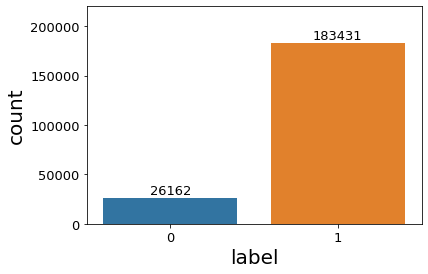

In [213]:
plt.ylim(0,220000)
ax=sns.countplot(data['label'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+29000), ha='center', va='top', color='black', size=13)
plt.show()

- The dataset is imbalanced as the class '1' outnumbers class '0' with 81:19 proportion.
- Here,
 - class '1' : user **did pay** back the credit amount within 5 days of issuing the loan / Non-defaulter
 - class '0' : user **did not pay back** the credit amount within 5 days of issuing the loan / Defaulter
 

In [214]:
## Checking for null values in the dataset
data.isna().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

- **We do not have any missing values in this dataset**

In [215]:
## Checking the statistical summery of the features
data.describe().T

count          mean           std           min  \
label                 209593.0  0.875177      0.330519      0.000000       
aon                   209593.0  8112.343445   75696.082531 -48.000000      
daily_decr30          209593.0  5381.402289   9220.623400  -93.012667      
daily_decr90          209593.0  6082.515068   10918.812767 -93.012667      
rental30              209593.0  2692.581910   4308.586781  -23737.140000   
rental90              209593.0  3483.406534   5770.461279  -24720.580000   
last_rech_date_ma     209593.0  3755.847800   53905.892230 -29.000000      
last_rech_date_da     209593.0  3712.202921   53374.833430 -29.000000      
last_rech_amt_ma      209593.0  2064.452797   2370.786034   0.000000       
cnt_ma_rech30         209593.0  3.978057      4.256090      0.000000       
fr_ma_rech30          209593.0  3737.355121   53643.625172  0.000000       
sumamnt_ma_rech30     209593.0  7704.501157   10139.621714  0.000000       
medianamnt_ma_rech30  209593.0  1812.817952   2070.864620   0.000000       
medianmarechprebal30  209593.0  3851.927942   54006.374433 -200.000000     
cnt_ma_rech90         209593.0  6.315430      7.193470      0.000000       
fr_ma_rech90          209593.0  7.716780      12.590251     0.000000       
sumamnt_ma_rech90     209593.0  12396.218352  16857.793882  0.000000       
medianamnt_ma_rech90  209593.0  1864.595821   2081.680664   0.000000       
medianmarechprebal90  209593.0  92.025541     369.215658   -200.000000     
cnt_da_rech30         209593.0  262.578110    4183.897978   0.000000       
fr_da_rech30          209593.0  3749.494447   53885.414979  0.000000       
cnt_da_rech90         209593.0  0.041495      0.397556      0.000000       
fr_da_rech90          209593.0  0.045712      0.951386      0.000000       
cnt_loans30           209593.0  2.758981      2.554502      0.000000       
amnt_loans30          209593.0  17.952021     17.379741     0.000000       
maxamnt_loans30       209593.0  274.658747    4245.264648   0.000000       
medianamnt_loans30    209593.0  0.054029      0.218039      0.000000       
cnt_loans90           209593.0  18.520919     224.797423    0.000000       
amnt_loans90          209593.0  23.645398     26.469861     0.000000       
maxamnt_loans90       209593.0  6.703134      2.103864      0.000000       
medianamnt_loans90    209593.0  0.046077      0.200692      0.000000       
payback30             209593.0  3.398826      8.813729      0.000000       
payback90             209593.0  4.321485      10.308108     0.000000       

                           25%          50%       75%            max  
label                 1.000     1.000000     1.00      1.000000       
aon                   246.000   527.000000   982.00    999860.755168  
daily_decr30          42.440    1469.175667  7244.00   265926.000000  
daily_decr90          42.692    1500.000000  7802.79   320630.000000  
rental30              280.420   1083.570000  3356.94   198926.110000  
rental90              300.260   1334.000000  4201.79   200148.110000  
last_rech_date_ma     1.000     3.000000     7.00      998650.377733  
last_rech_date_da     0.000     0.000000     0.00      999171.809410  
last_rech_amt_ma      770.000   1539.000000  2309.00   55000.000000   
cnt_ma_rech30         1.000     3.000000     5.00      203.000000     
fr_ma_rech30          0.000     2.000000     6.00      999606.368132  
sumamnt_ma_rech30     1540.000  4628.000000  10010.00  810096.000000  
medianamnt_ma_rech30  770.000   1539.000000  1924.00   55000.000000   
medianmarechprebal30  11.000    33.900000    83.00     999479.419319  
cnt_ma_rech90         2.000     4.000000     8.00      336.000000     
fr_ma_rech90          0.000     2.000000     8.00      88.000000      
sumamnt_ma_rech90     2317.000  7226.000000  16000.00  953036.000000  
medianamnt_ma_rech90  773.000   1539.000000  1924.00   55000.000000   
medianmarechprebal90  14.600    36.000000    79.31     41456.500000   
cnt_da_rech30       

**Following featrues have negative values:**
- aon:	age on cellular network in days<br>
- daily_decr30:	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)<br>
- daily_decr90:	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)<br>
- rental30:	Average main account balance over last 30 days<br>
- rental90:	Average main account balance over last 90 days<br>
- last_rech_date_ma:	Number of days till last recharge of main account<br>
- last_rech_date_da:	Number of days till last recharge of data account<br>
- medianmarechprebal30:	Median of main account balance just before recharge in last 30 days at user level (in IndonesianRupiah)<br>
- medianmarechprebal90:	Median of main account balance just before recharge in last 90 days at user level (in IndonasianRupiah)<br>


**From the feature description it can be concluded that the <br>
'aon', 'daily_decr30', 'daily_decr90', 'last_rech_date_ma', 'last_rech_date_da' <br>
cannot have negative values.**

In [216]:
## Converting negative values in the above mentioned features to positive.
a=['aon', 'daily_decr30', 'daily_decr90', 'last_rech_date_ma', 'last_rech_date_da']
for i in a:
    data[i]=abs(data[i])

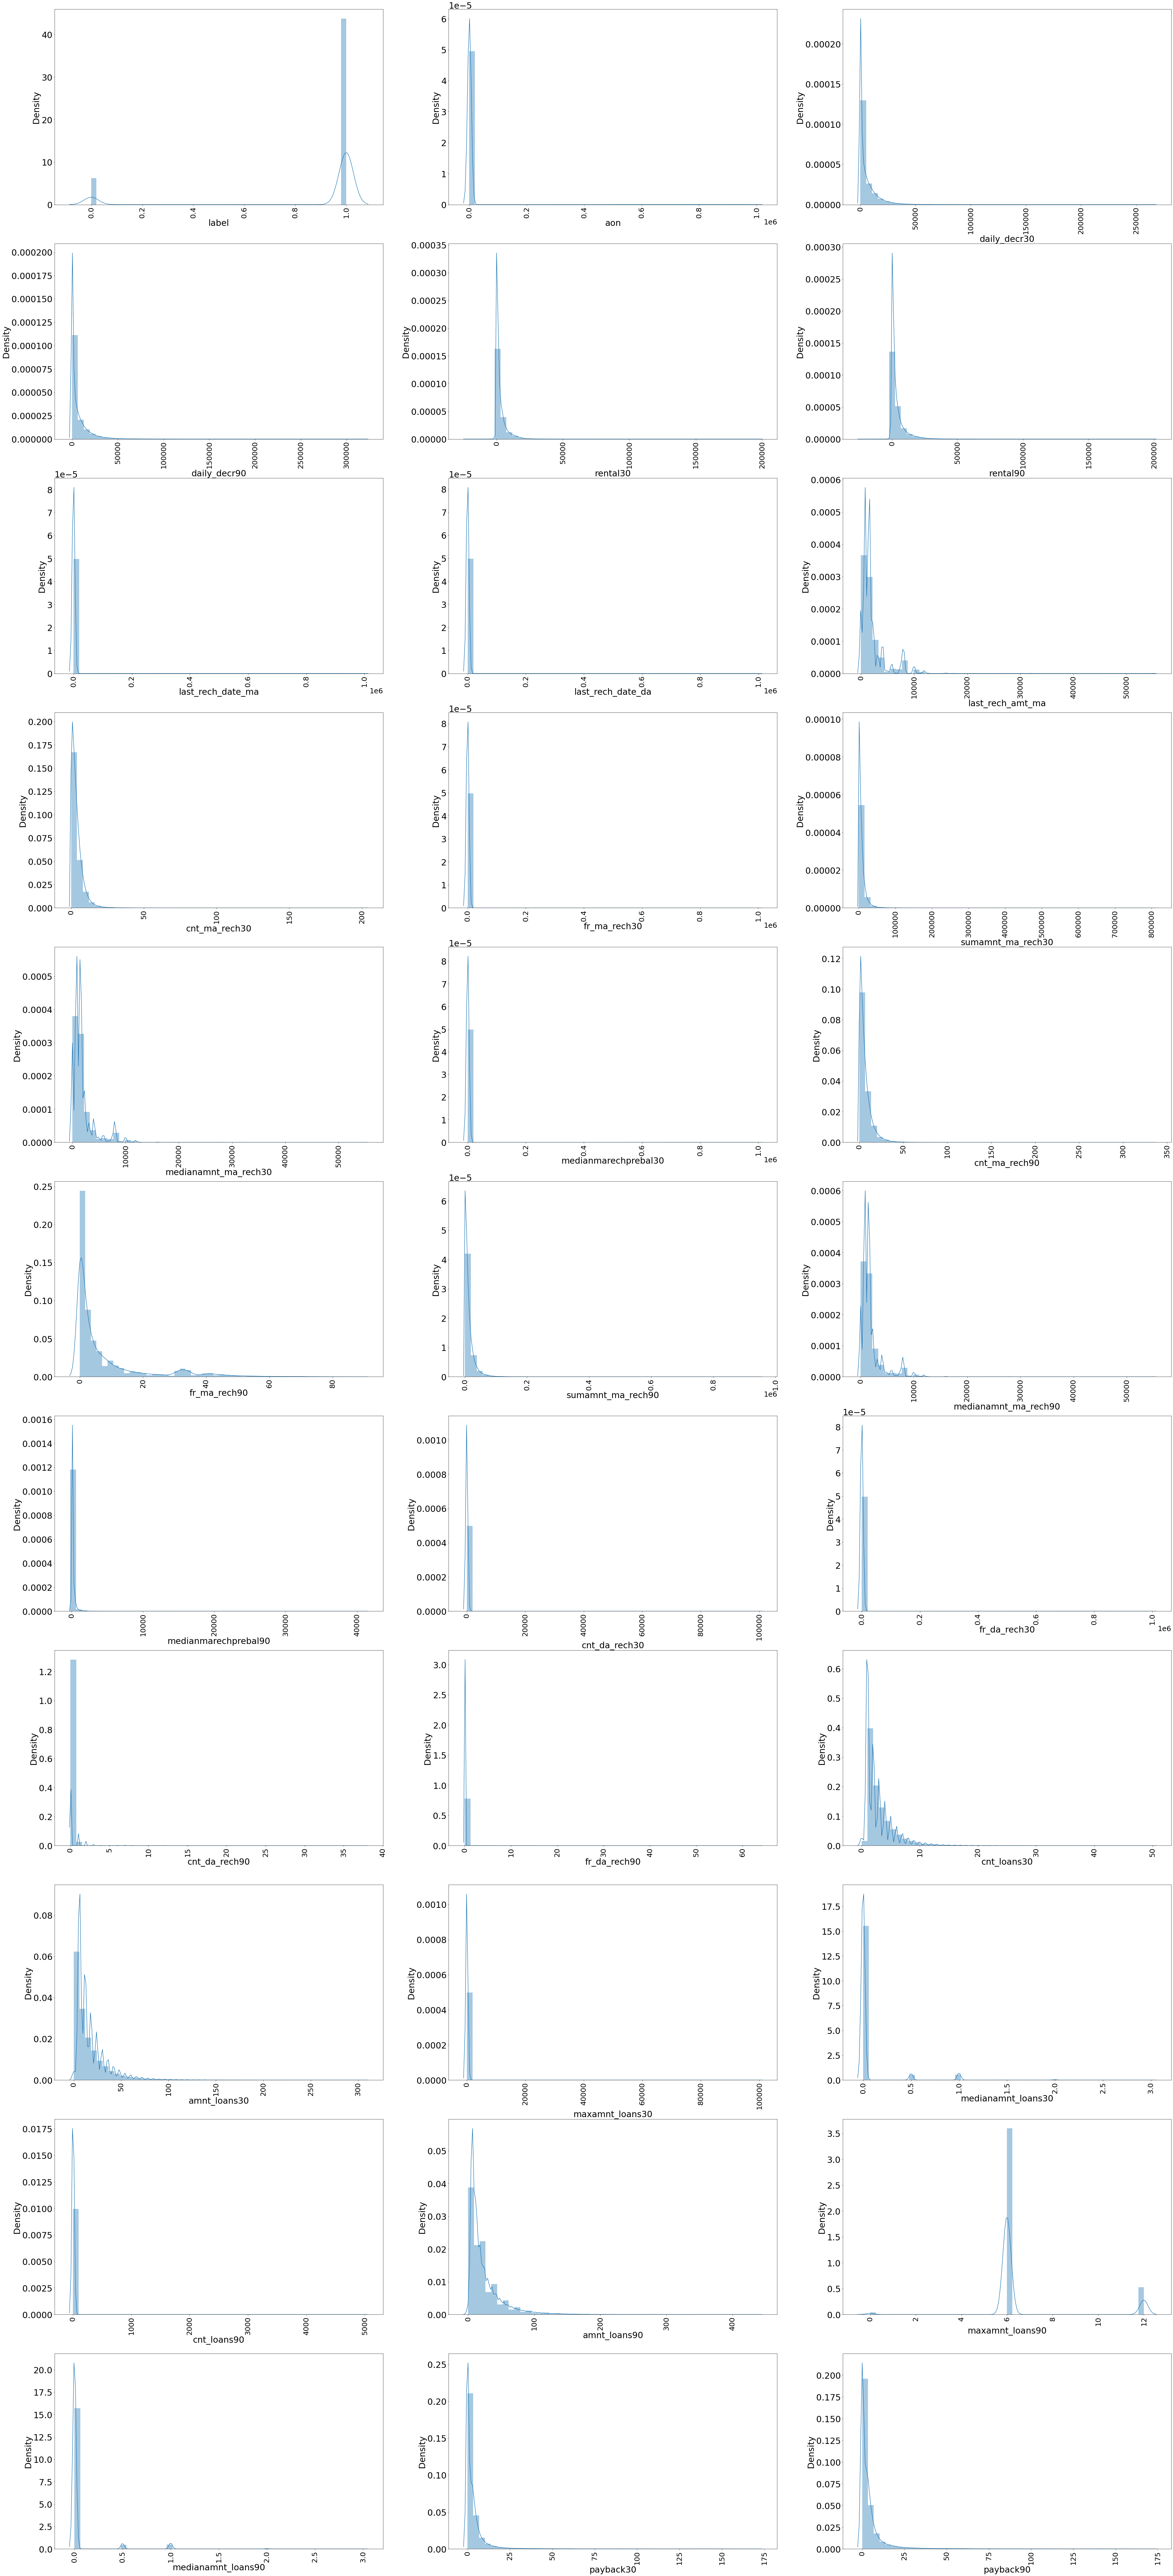

In [217]:
## Checking the distributions of continuous features using 'DistPlots'
plt.figure(figsize=(70,450))

plot_number=1
parameters = {'ytick.labelsize': 30,
                  'xtick.labelsize': 25,'font.size': 30.0}
plt.rcParams.update(parameters)

for i in data:
    if plot_number<35:
        ax=plt.subplot(30,3,plot_number)
        sns.distplot(data[i])
        plt.xticks(rotation=90)
        plt.xlabel(i)
    plot_number+=1

- All the features are highly right skewed and have extreme values.

### Outliers detection and treatment

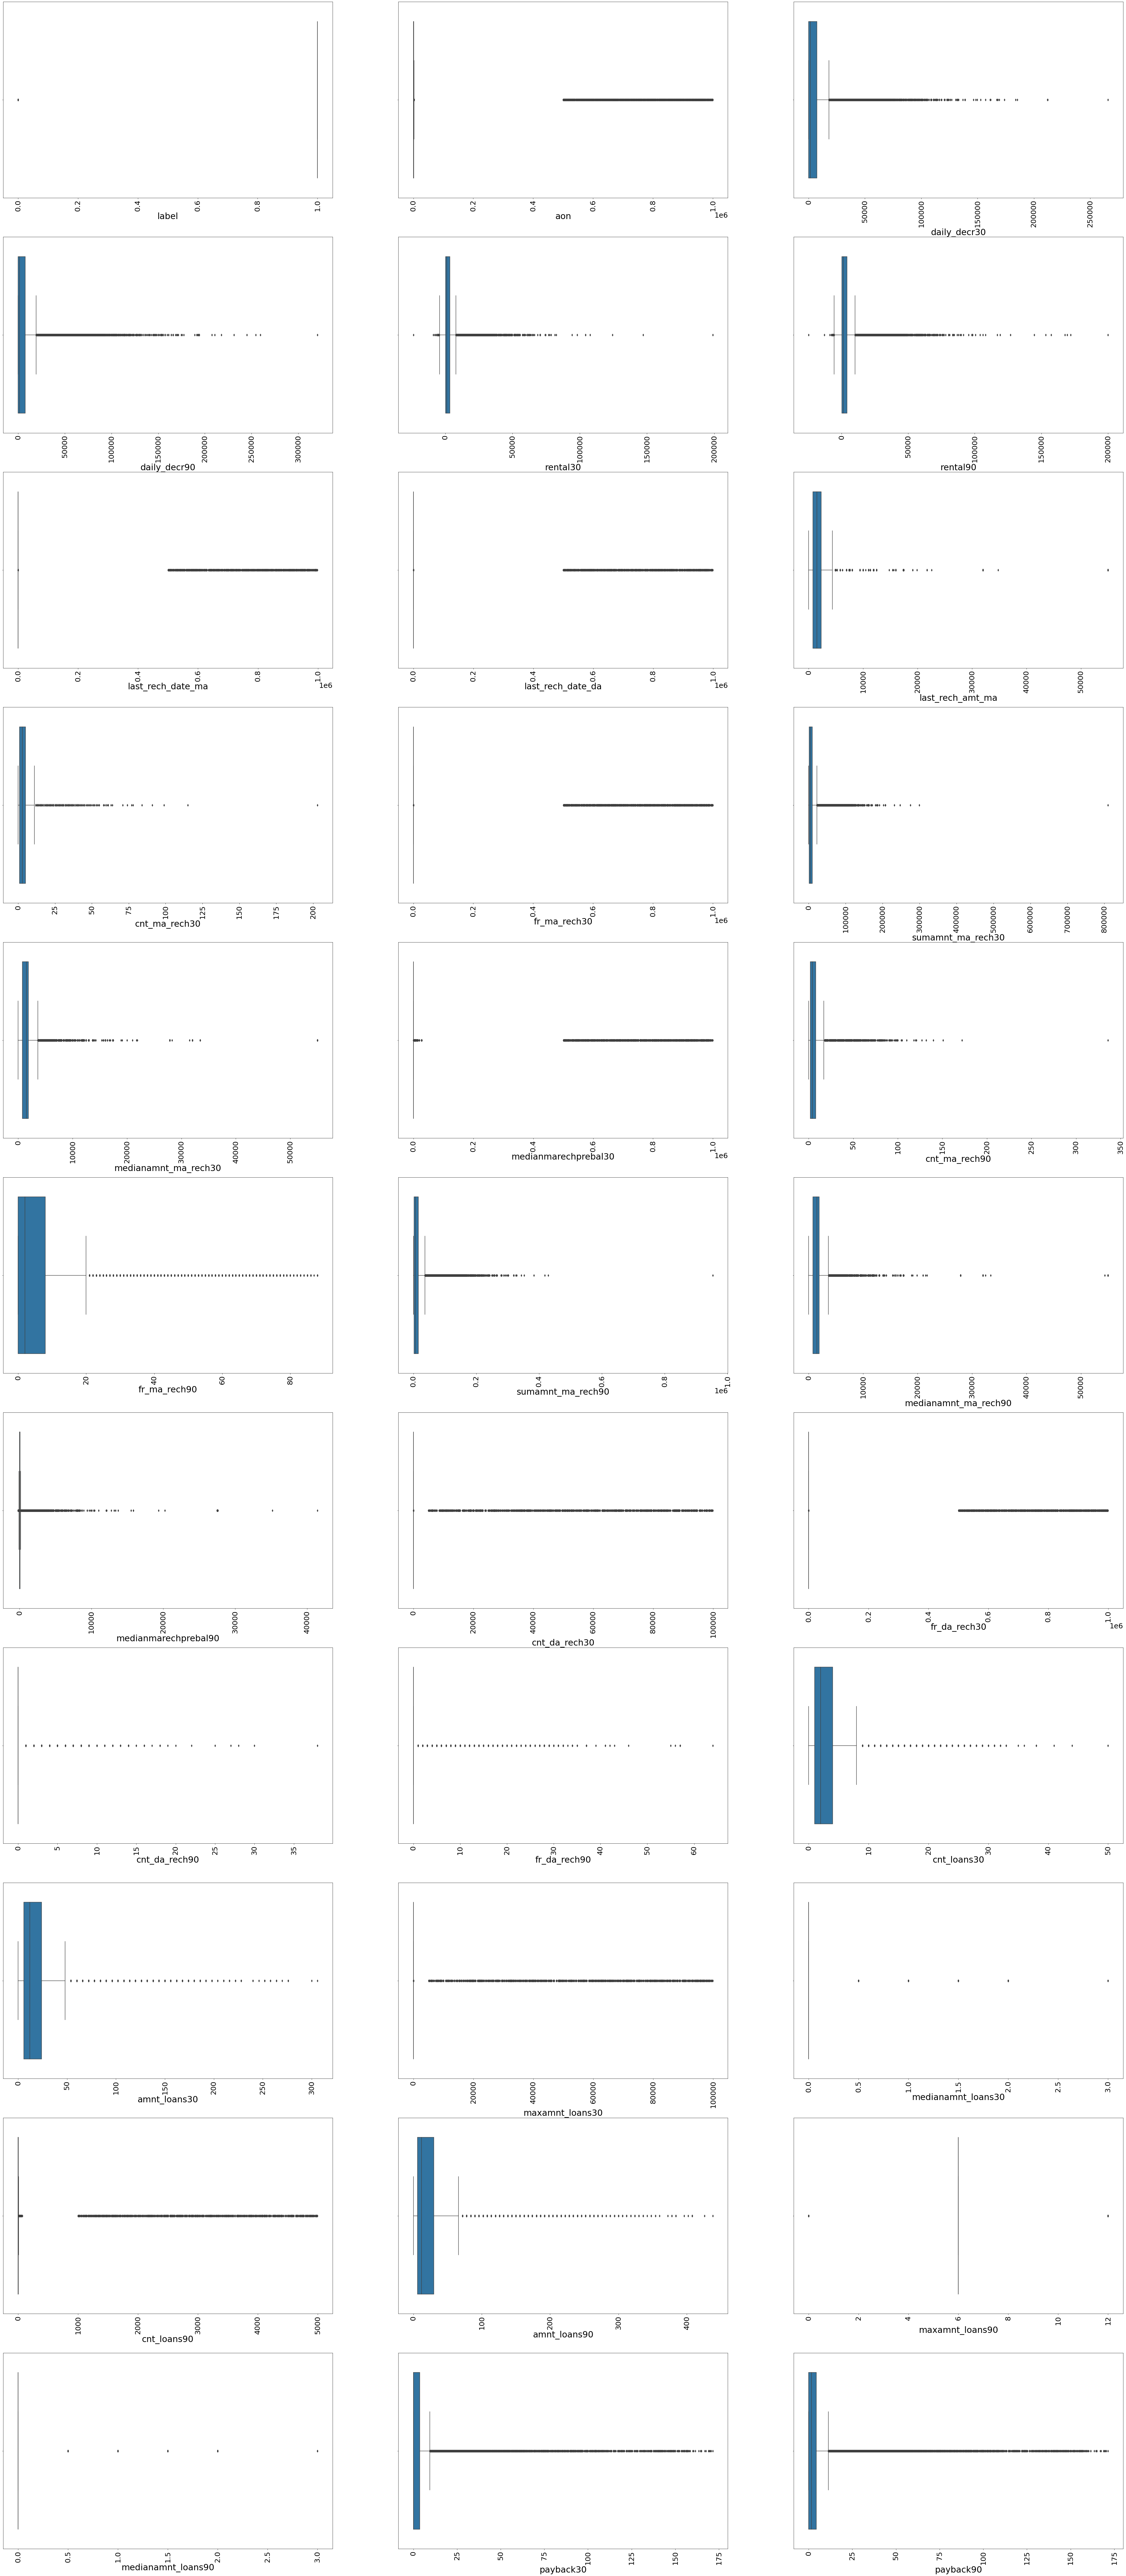

In [218]:
## Checking the outliers in the continuous features using 'BoxPlots'
plt.figure(figsize=(70,450))

plot_number=1
parameters = {'ytick.labelsize': 15,
                  'xtick.labelsize': 25,'font.size': 30.0}
plt.rcParams.update(parameters)

for i in data:
    if plot_number<35:
        ax=plt.subplot(30,3,plot_number)
        sns.boxplot(data[i])
        plt.xticks(rotation=90)
        plt.xlabel(i)
    plot_number+=1

<font color = 'red'>

- **All the features have outliers**

In [219]:
# rejecting data beyond 5 std to limit outliers
from scipy.stats import zscore

z_score=zscore(data.drop('label',axis=1))
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<5).all(axis=1)
data1=data[filtering_entry]

data1.shape

(190496, 33)

In [220]:
## Checking the data loss after removing the outliers
data_loss=((209593-data1.shape[0])/209593)*100
data_loss

9.111468417361266

**We are losing aboout 9% data which is fine**

In [221]:
data=data1

<font color='red'>

### Using 'BoxPlot' to understand the relationship between continuous features ans the categorical target.

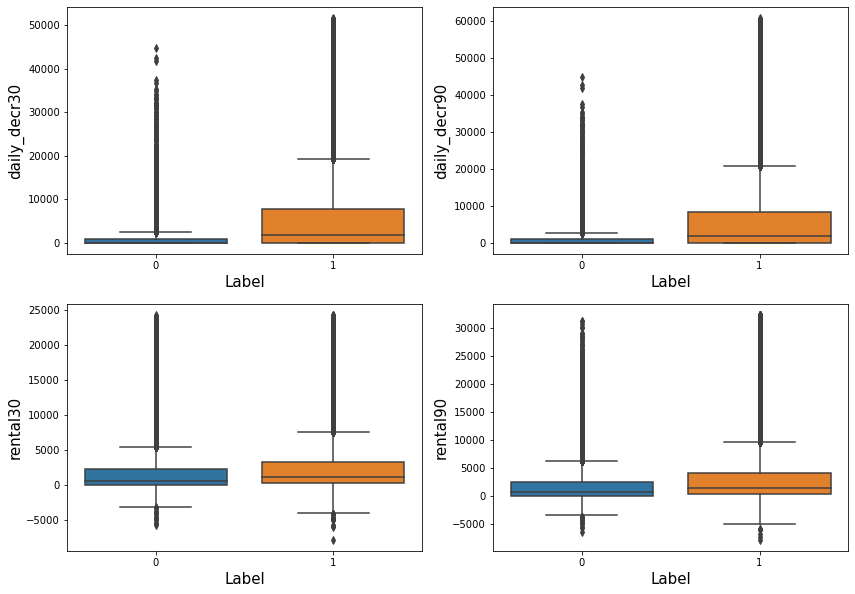

In [161]:
## ['daily_decr30', 'daily_decr90', 'rental30', 'rental90'] vs 'label'
plt.figure(figsize=(14,10))

plot_number=1
parameters = {'ytick.labelsize': 10,
                  'xtick.labelsize': 10,'font.size': 15.0}
plt.rcParams.update(parameters)

a=['daily_decr30', 'daily_decr90', 'rental30', 'rental90']

for i in a:
    if plot_number<6:
        ax=plt.subplot(2,2,plot_number)
        sns.boxplot(data['label'],data[i])
        #plt.xticks(rotation=90)
        plt.xlabel('Label')
    plot_number+=1

- Defaulters (class:0) tend to spend less amount daily compared to non-defaulters (class:1).
- Average main account balance of defaulters (class:0) over last 30 and 90 dayes, tends to be less than the average balance of non-defaulters (class1).

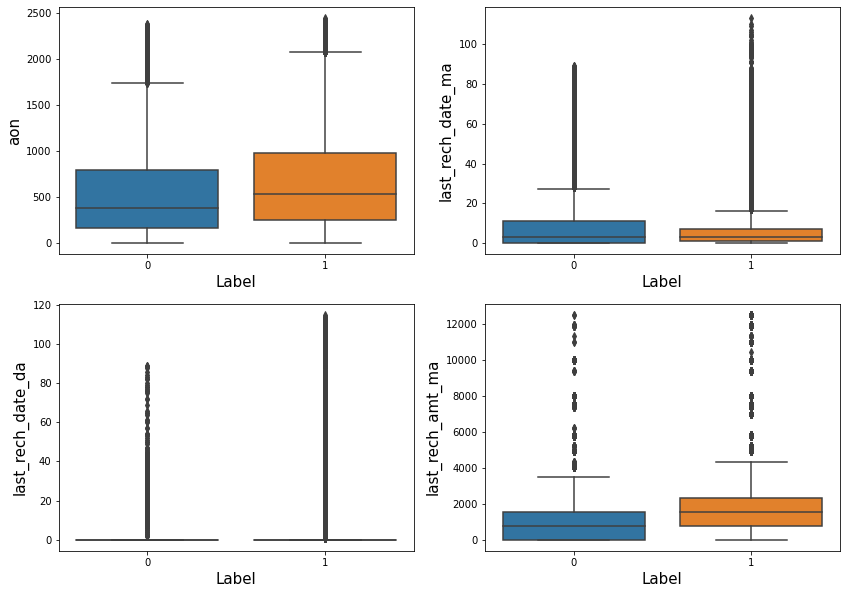

In [162]:
## ['aon','last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma'] vs 'label'
plt.figure(figsize=(14,10))

plot_number=1
parameters = {'ytick.labelsize': 10,
                  'xtick.labelsize': 10,'font.size': 15.0}
plt.rcParams.update(parameters)

a=['aon','last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma']

for i in a:
    if plot_number<6:
        ax=plt.subplot(2,2,plot_number)
        sns.boxplot(data['label'],data[i])
        #plt.xticks(rotation=90)
        plt.xlabel('Label')
    plot_number+=1

- The average age on the cellular network of defaulters (class:0) tends to be less than the average age on the cellular network of non-defaulters (class:1). This means that longer the customer stays with the cellular network less the chances of him/her default on the credit.
- Generally defaulters tend to recharge the main account less frequently than the non-defaulters.
- On an average the last recharge amount on main account of non-defaulters tends to be higher compared to the defaulters.

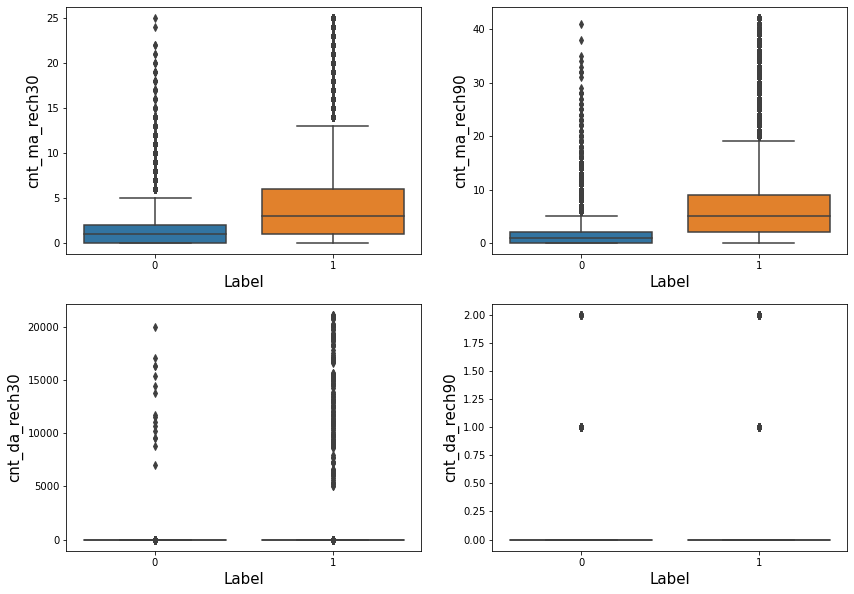

In [163]:
## ['cnt_ma_rech30', 'cnt_ma_rech90', 'cnt_da_rech30', 'cnt_da_rech90'] vs 'label'

plt.figure(figsize=(14,10))

plot_number=1
parameters = {'ytick.labelsize': 10,
                  'xtick.labelsize': 10,'font.size': 15.0}
plt.rcParams.update(parameters)

a=['cnt_ma_rech30', 'cnt_ma_rech90', 'cnt_da_rech30', 'cnt_da_rech90']

for i in a:
    if plot_number<6:
        ax=plt.subplot(2,2,plot_number)
        sns.boxplot(data['label'],data[i])
        #plt.xticks(rotation=90)
        plt.xlabel('Label')
    plot_number+=1

- Defaulters tend to recharge the main account less frequently compared to non-defaulters.
- Data of data account recharge frequency over last 30 days shows lot of un realistic values which we have to remove during the further processing of the data.
- Data of number of times data account was recharged over last 90 days is inconclusive.

In [164]:
data['cnt_da_rech30'].where(data['cnt_da_rech30']<100).value_counts()

0.0    188338
1.0    1852  
2.0    130   
Name: cnt_da_rech30, dtype: int64

- Almost 99% of the observations in 'cnt_da_rech30' are '0's. Hence we will drop this feature altogether.

In [165]:
data['cnt_da_rech90'].where(data['cnt_da_rech90']<100).value_counts()

0    186486
1    3769  
2    241   
Name: cnt_da_rech90, dtype: int64

- Almost 98% of the observations in 'cnt_da_rech90' are '0's. Hence we will drop this feature altogether.

In [166]:
## Dropping the above mentioned features
data.drop(['cnt_da_rech90','cnt_da_rech30'],axis=1,inplace=True)

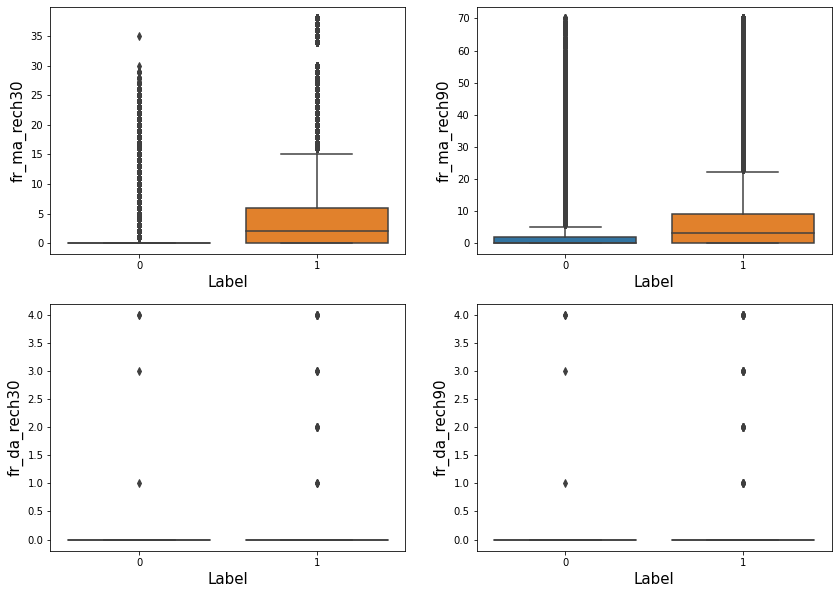

In [167]:
## ['fr_ma_rech30', 'fr_ma_rech90', 'fr_da_rech30', 'fr_da_rech90'] vs 'label'

plt.figure(figsize=(14,10))

plot_number=1
parameters = {'ytick.labelsize': 10,
                  'xtick.labelsize': 10,'font.size': 15.0}
plt.rcParams.update(parameters)

a=['fr_ma_rech30', 'fr_ma_rech90', 'fr_da_rech30', 'fr_da_rech90']

for i in a:
    if plot_number<6:
        ax=plt.subplot(2,2,plot_number)
        sns.boxplot(data['label'],data[i])
        #plt.xticks(rotation=90)
        plt.xlabel('Label')
    plot_number+=1

- On an average defaulters tend to recharge their main account less frequently compared to the non-defaulters.
- Data on the recharge frequency of data account over last 30 and 90 days is inconclusive.

In [168]:
data['fr_da_rech90'].value_counts()

0    190447
4    16    
3    12    
2    11    
1    10    
Name: fr_da_rech90, dtype: int64

- 99.9% of the observations in 'fr_da_rech90' are '0's. Hence we will drop this feature altogether.

In [169]:
data['fr_da_rech30'].value_counts()

0.0    190466
4.0    11    
2.0    8     
3.0    6     
1.0    5     
Name: fr_da_rech30, dtype: int64

- 99.9% of the observations in 'fr_da_rech30' are '0's. Hence we will drop this feature altogether.

In [170]:
## Dropping the above mentioned features
data.drop(['fr_da_rech90','fr_da_rech30'],axis=1,inplace=True)

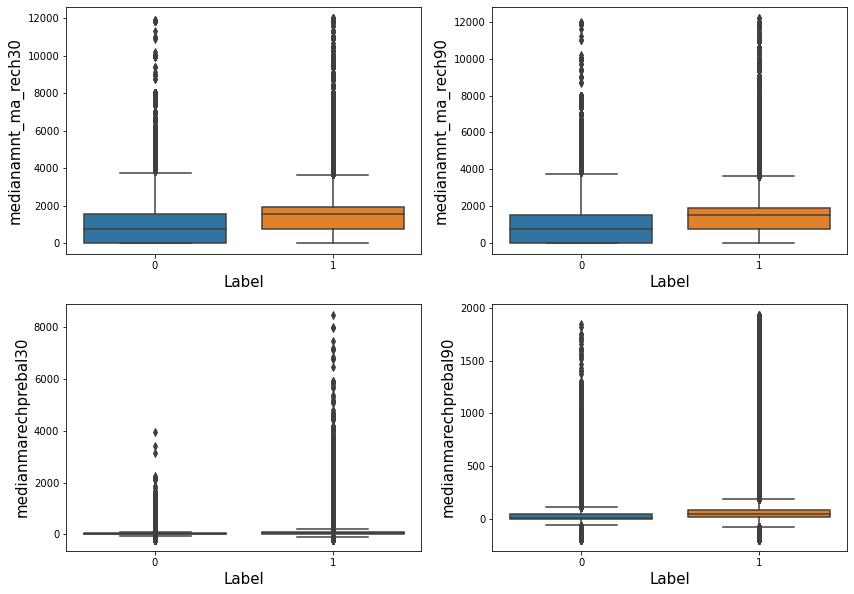

In [171]:
## ['medianamnt_ma_rech30','medianamnt_ma_rech90', 'medianmarechprebal30', 'medianmarechprebal90'] vs 'label'

plt.figure(figsize=(14,10))

plot_number=1
parameters = {'ytick.labelsize': 10,
                  'xtick.labelsize': 10,'font.size': 15.0}
plt.rcParams.update(parameters)

a=['medianamnt_ma_rech30','medianamnt_ma_rech90', 'medianmarechprebal30', 'medianmarechprebal90']

for i in a:
    if plot_number<6:
        ax=plt.subplot(2,2,plot_number)
        sns.boxplot(data['label'],data[i])
        #plt.xticks(rotation=90)
        plt.xlabel('Label')
    plot_number+=1

- Medians of last recharge amount on main account of defaulters tend to be less compared to the non-defaulters. This means that non-defaulters tend to recharge their main account with higher amounts compared to defaulters.
- The main account balance of non-defaulters just before the recharge tends to be higher compared to the defaulters.

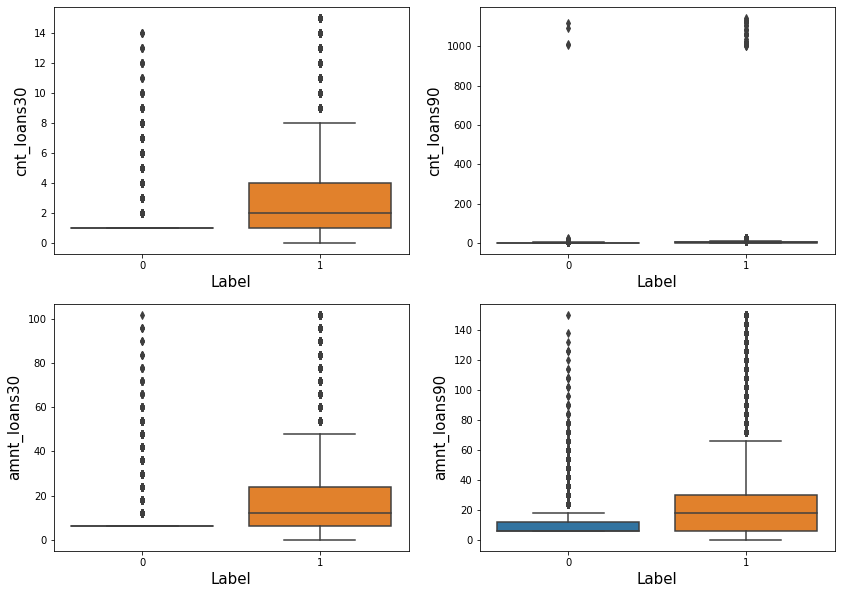

In [172]:
## ['cnt_loans30', 'cnt_loans90', 'amnt_loans30', 'amnt_loans90'] vs 'label'

plt.figure(figsize=(14,10))

plot_number=1
parameters = {'ytick.labelsize': 10,
                  'xtick.labelsize': 10,'font.size': 15.0}
plt.rcParams.update(parameters)

a=['cnt_loans30', 'cnt_loans90', 'amnt_loans30', 'amnt_loans90',]

for i in a:
    if plot_number<6:
        ax=plt.subplot(2,2,plot_number)
        sns.boxplot(data['label'],data[i])
        #plt.xticks(rotation=90)
        plt.xlabel('Label')
    plot_number+=1

- Non-defaulters tend to take loans more frequently compared to the defaulters.
- Non-defaulters tend to take higher amount loans in total compared to the defaulters.
- 'cnt_loans90' shows some unrealistic values. We will replace them with the most frequently occuring value in that feature.

In [173]:
## Checking the most frequently occuring value in cnt_loans90'
data['cnt_loans90'].mode()

0    1.0
dtype: float64

In [174]:
## Replacing the remaining outliers with the most frequently occuring value
data['cnt_loans90']=data['cnt_loans90'].mask(data['cnt_loans90']>50, 1)

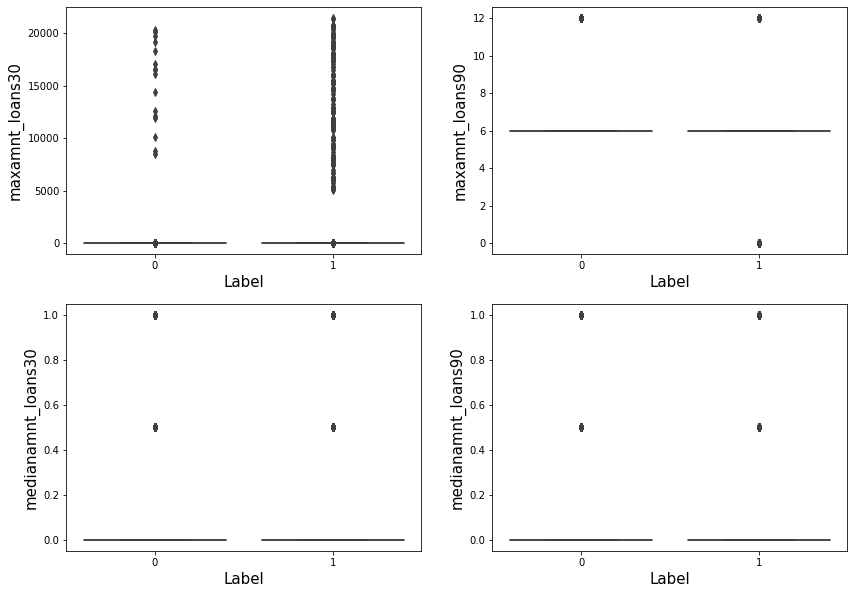

In [175]:
## ['maxamnt_loans30', 'maxamnt_loans90', 'medianamnt_loans30', 'medianamnt_loans90'] vs 'label'

plt.figure(figsize=(14,10))

plot_number=1
parameters = {'ytick.labelsize': 10,
                  'xtick.labelsize': 10,'font.size': 15.0}
plt.rcParams.update(parameters)

a=['maxamnt_loans30', 'maxamnt_loans90', 'medianamnt_loans30', 'medianamnt_loans90']

for i in a:
    if plot_number<6:
        ax=plt.subplot(2,2,plot_number)
        sns.boxplot(data['label'],data[i])
        #plt.xticks(rotation=90)
        plt.xlabel('Label')
    plot_number+=1

- Data of maximum amount of loan taken in last 30 and 90 days seem to be inconclusive.
- Data of Median of amounts of loan taken by the user in last 30 and 90 days also seem inconlusive visually.

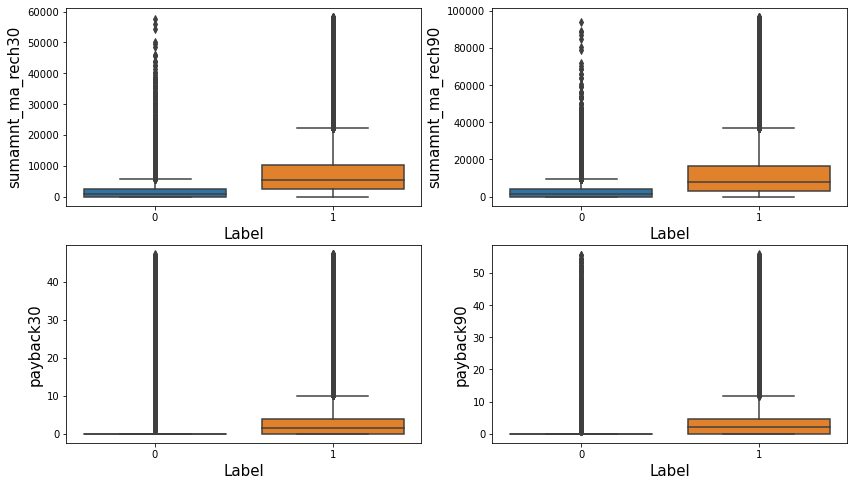

In [176]:
## ['sumamnt_ma_rech30', 'sumamnt_ma_rech90', 'payback30', 'payback90'] vs 'label'

plt.figure(figsize=(14,8))

plot_number=1
parameters = {'ytick.labelsize': 10,
                  'xtick.labelsize': 10,'font.size': 15.0}
plt.rcParams.update(parameters)

a=['sumamnt_ma_rech30', 'sumamnt_ma_rech90', 'payback30', 'payback90']

for i in a:
    if plot_number<6:
        ax=plt.subplot(2,2,plot_number)
        sns.boxplot(data['label'],data[i])
        #plt.xticks(rotation=90)
        plt.xlabel('Label')
    plot_number+=1

- Total amounts of recharge done on the main account by the non-defaulters tend to be higher compared to the defaulters.
- Average of payback time over last 30 and 90 days for non-defaulters tend to be higher compared to the defaulters.

#### Seperating the features and the target

In [177]:
X=data.drop('label',axis=1)
y=data['label']

## Feature Selection using SelectKBest and f_classif Scoring

In [178]:
## Importing SelectKBest and f_classif scoring
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [179]:
selectbest=SelectKBest(score_func=f_classif,k=28)
selectbest.fit(X,y)

SelectKBest(k=28)

In [180]:
## Saving the scores and the feature names in dataframes
scores_df=pd.DataFrame(selectbest.scores_)
column_df=pd.DataFrame(X.columns)

In [181]:
feature_scores=pd.concat([column_df,scores_df],axis=1) # Concating two DFs
feature_scores.columns=['Features','Scores'] # Naming the columns
feature_scores=feature_scores.nlargest(32,'Scores')
feature_scores

Features        Scores
13  cnt_ma_rech90         14091.163526
8   cnt_ma_rech30         13934.723911
15  sumamnt_ma_rech90     11943.878691
10  sumamnt_ma_rech30     11819.171424
23  amnt_loans90          9516.601294 
22  cnt_loans90           9333.788659 
19  amnt_loans30          9221.703639 
18  cnt_loans30           8820.432347 
1   daily_decr30          6745.390687 
2   daily_decr90          6700.283008 
11  medianamnt_ma_rech30  4625.048437 
9   fr_ma_rech30          4364.214970 
7   last_rech_amt_ma      4055.218716 
16  medianamnt_ma_rech90  3492.266285 
17  medianmarechprebal90  2177.629258 
12  medianmarechprebal30  2038.006073 
26  payback30             2001.071010 
27  payback90             1938.972565 
14  fr_ma_rech90          1740.103980 
5   last_rech_date_ma     1366.308554 
0   aon                   1290.224477 
24  maxamnt_loans90       1206.257003 
4   rental90              1175.149731 
3   rental30              658.608056  
21  medianamnt_loans30    337.796509  
25  medianamnt_loans90    208.066210  
6   last_rech_date_da     136.706265  
20  maxamnt_loans30       0.181228

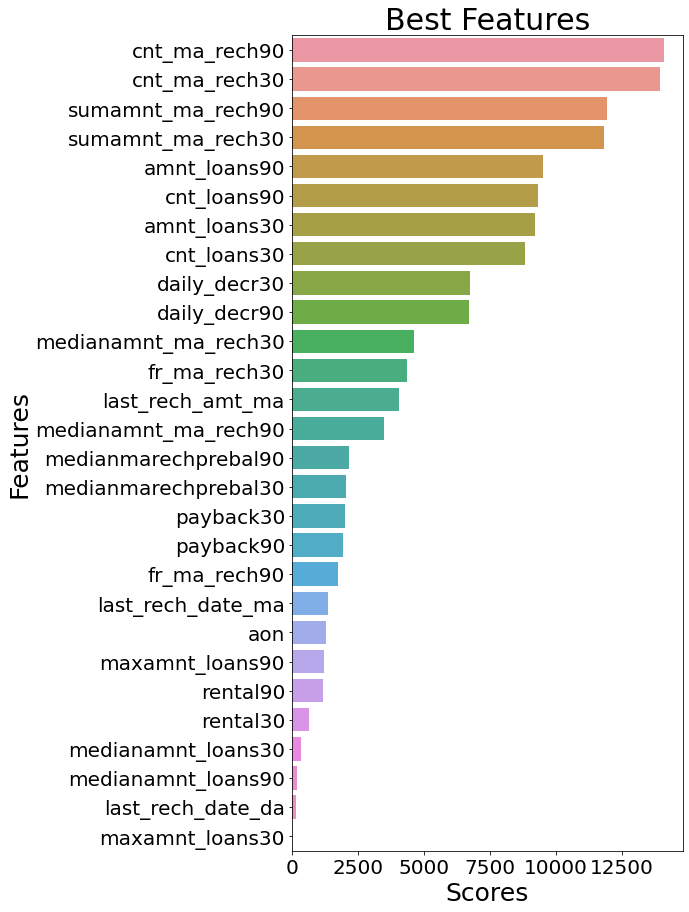

In [191]:
## Visualizing the features and their respective scores
plt.figure(figsize=(7,15))
parameters = {'ytick.labelsize': 20,
                  'xtick.labelsize': 20,'font.size': 25.0}
plt.rcParams.update(parameters)
sns.barplot(x=feature_scores.Scores,y=feature_scores.Features)
plt.title('Best Features')
plt.show()

In [183]:
## Dropping the features with low scores
X=X.drop(['maxamnt_loans30','last_rech_date_da','medianamnt_loans90','medianamnt_loans30'],axis=1)

### Using SMOTE to balance the dataset

In [58]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')

In [59]:
X_sm,y_sm=smote.fit_sample(X,y)

In [60]:
print(y_sm.value_counts())

0    166312
1    166312
Name: label, dtype: int64


- Dataset is now balanced 

#### Scaling the features using StandardScaler

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_sm)

### Splitting the dataset into the training and testing sets

In [62]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_sm,test_size=0.25,random_state=42)

### Importing the classification performance metrics

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,plot_roc_curve,f1_score
from sklearn.model_selection import cross_val_score

## Model 1: Logistic Regression

In [64]:
## Importing the Logistic Regression Model from sklearn library
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [66]:
## Training the logistic regression model
lr.fit(X_train,y_train)

LogisticRegression()

In [67]:
## Predicting the output for test set
y_lr=lr.predict(X_test)

In [68]:
## Printing the accuracy score for the Logistic Regression Model
lr_score=accuracy_score(y_test,y_lr)
lr_score

0.8401799028332291

In [69]:
### Printing the mean Cross Validation Score for logistic Regression model
lr_cvs=cross_val_score(lr,X_scaled,y_sm,cv=5).mean()
lr_cvs

0.841244213100816

In [70]:
## Printing the f1-score for the Logistic Regression Model
lr_f1=f1_score(y_test,y_lr)
lr_f1

0.8335254033470287

In [71]:
## Printing confusion matrix for the Logistic Regression Model
print(confusion_matrix(y_test,y_lr))

[[36595  5117]
 [ 8173 33271]]


In [72]:
## Printing the Classification Report for the Logistic Regression Model
print(classification_report(y_test,y_lr))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85     41712
           1       0.87      0.80      0.83     41444

    accuracy                           0.84     83156
   macro avg       0.84      0.84      0.84     83156
weighted avg       0.84      0.84      0.84     83156



## Model 2: RandomForestClassifier

In [73]:
## Importing the RandomForest Classifier from sklearn
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [74]:
## Training the Random Forest Classifier over training data
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [75]:
## Predicting the output for test set
y_rfc=rfc.predict(X_test)

In [76]:
## Printing the accuracy score for the Random Forest Classifier
rfc_score=accuracy_score(y_test,y_rfc)
rfc_score

0.9361681658569436

In [77]:
### Printing the mean Cross Validation Score for the Random Forest Classifier model
rfc_cvs=cross_val_score(rfc,X_scaled,y_sm,cv=3).mean()
rfc_cvs

0.9322749475136424

In [78]:
## Printing the f1-score for the Random Forest Classifier
rfc_f1=f1_score(y_test,y_rfc)
rfc_f1

0.9362769814401306

In [79]:
## Printing confusion matrix for the Random Forest Classifier

print(confusion_matrix(y_test,y_rfc))

[[38853  2859]
 [ 2449 38995]]


In [80]:
## Printing the Classification Report for the Random Forest Classifier
print(classification_report(y_test,y_rfc))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     41712
           1       0.93      0.94      0.94     41444

    accuracy                           0.94     83156
   macro avg       0.94      0.94      0.94     83156
weighted avg       0.94      0.94      0.94     83156



## Model 3: KNeighborsClassifier

In [135]:
## Importing the KNeighbors Classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()

In [136]:
## Training the KNeighbors Classifier over training data
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [83]:
## Predicting the output for test set
y_knc=knc.predict(X_test)

In [84]:
## Printing the accuracy score for the KNeighbors Classifier

knc_score=accuracy_score(y_test,y_knc)
knc_score

0.8590360286690076

In [127]:
### Printing the mean Cross Validation Score for the KNeighbors Classifier model

knc_cvs=cross_val_score(knc,X_scaled,y_sm,cv=3).mean()
knc_cvs

0.8533058444307525

In [129]:
## Printing the f1-score for the KNeighbors Classifier

knc_f1=f1_score(y_test,y_knc)
knc_f1

0.8480582775963085

In [130]:
## Printing the confusion matrix for the KNeighbors Classifier

print(confusion_matrix(y_test,y_knc))

[[38721  2991]
 [ 8731 32713]]


In [131]:
## Printing the classification report for the KNeighbors Classifier

print(classification_report(y_test,y_knc))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87     41712
           1       0.92      0.79      0.85     41444

    accuracy                           0.86     83156
   macro avg       0.87      0.86      0.86     83156
weighted avg       0.87      0.86      0.86     83156



## Model 4: Decision Tree Classifier

In [90]:
## Importing the DecisionTree Classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [91]:
## Training the DecisionTree Classifier over training data
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [92]:
## Predicting the output for test set
y_dt=dt.predict(X_test)

In [93]:
## Printing the accuracy score for the DecisionTree Classifier
dt_score=accuracy_score(y_test,y_dt)
dt_score

0.8946438020106787

In [94]:
## Printing the cross validation score for the DecisionTree Classifier
dt_cvs=cross_val_score(dt,X_scaled,y_sm,cv=5).mean()
dt_cvs

0.8909490031779621

In [95]:
## Printing the f1-score for the DecisionTree Classifier
dt_f1=f1_score(y_test,y_dt)
dt_f1

0.893492347155865

In [99]:
## Printing the confusion matrix for the DecisionTree Classifier

print(confusion_matrix(y_test,y_dt))

array([[37647,  4065],
       [ 4696, 36748]], dtype=int64)

In [97]:
## Printing the classification report for the DecisionTree Classifier

print(classification_report(y_test,y_dt))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     41712
           1       0.90      0.89      0.89     41444

    accuracy                           0.89     83156
   macro avg       0.89      0.89      0.89     83156
weighted avg       0.89      0.89      0.89     83156



## Model 5: Gradient Boosting Classifier

In [110]:
## Importing the Gradient Boosting Classifier from sklearn

from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [111]:
## Training the Gradient Boosting Classifier over training data

gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [112]:
## Predicting the output for test set
y_gbc=gbc.predict(X_test)

In [113]:
## Printing the accuracy score for the Gradient Boosting Classifier

gbc_score=accuracy_score(y_test,y_gbc)
gbc_score

0.8856486603492232

In [114]:
## Printing the cross validation score for the Gradient Boosting Classifier

gbc_cvs=cross_val_score(gbc, X_scaled,y_sm,cv=3).mean()
gbc_cvs

0.880453666921151

In [115]:
## Printing the f1-score for the Gradient Boosting Classifier
gbc_f1=f1_score(y_test,y_gbc)
gbc_f1

0.8837061406190763

In [116]:
## Printing the confusion matrix for the Gradient Boosting Classifier
print(confusion_matrix(y_test,y_gbc))

[[37518  4194]
 [ 5315 36129]]


In [117]:
## Printing the classification report for the Gradient Boosting Classifier
print(classification_report(y_test,y_gbc))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89     41712
           1       0.90      0.87      0.88     41444

    accuracy                           0.89     83156
   macro avg       0.89      0.89      0.89     83156
weighted avg       0.89      0.89      0.89     83156



## Model 6: ADA Boost Classifier

In [118]:
## Importing the  AdaBoost Classifier from sklearn
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()

In [119]:
## Training the AdaBoost Classifier over training data
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [120]:
## Predicting the output for test set
y_abc=abc.predict(X_test)

In [121]:
## Printing the accuracy score for the AdaBoost Classifier
abc_score=accuracy_score(y_test,y_abc)
abc_score

0.8426210976958969

In [122]:
## Printing the cross validation score for the AdaBoost Classifier
abc_cvs=cross_val_score(abc,X_scaled,y_sm,cv=3).mean()
abc_cvs

0.8352885205212818

In [123]:
## Printing the f1-score for the AdaBoost Classifier

abc_f1=f1_score(y_test,y_abc)
abc_f1

0.8391806038561265

In [124]:
## Printing the confusion matrix for the AdaBoost Classifier

print(confusion_matrix(y_test,y_abc))

[[35924  5788]
 [ 7299 34145]]


In [125]:
## Printing the classification report for the AdaBoost Classifier

print(classification_report(y_test,y_abc))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85     41712
           1       0.86      0.82      0.84     41444

    accuracy                           0.84     83156
   macro avg       0.84      0.84      0.84     83156
weighted avg       0.84      0.84      0.84     83156



#### Storing the performance metrics for all the models in a dataframe

In [133]:
metrics=pd.DataFrame()
metrics['Model']=['Logistic Regression','ADAboost Classifier','KN Classifier','DecisionTree Classifier','RandomForest Classifier','GradientBoosting Classifier']
metrics['Accuracy Score']=[lr_score,abc_score,knc_score,dt_score,rfc_score,gbc_score]
metrics['Cross Val Score']=[lr_cvs,abc_cvs,knc_cvs,dt_cvs,rfc_cvs,gbc_cvs]
metrics['f1 Score']=[lr_f1,abc_f1,knc_f1,dt_f1,rfc_f1,gbc_f1]

metrics.nlargest(6,'Cross Val Score')

Model  Accuracy Score  Cross Val Score  f1 Score
4  RandomForest Classifier      0.936168        0.932275         0.936277
3  DecisionTree Classifier      0.894644        0.890949         0.893492
5  GradientBoosting Classifier  0.885649        0.880454         0.883706
2  KN Classifier                0.859036        0.853306         0.848058
0  Logistic Regression          0.840180        0.841244         0.833525
1  ADAboost Classifier          0.842621        0.835289         0.839181

<font color='red'>

- **Based on the above metrics comparison, it can be concluded that the Random Forest Classifier is our best performing model for the given data**

#### Printing the roc_auc curve for all the models

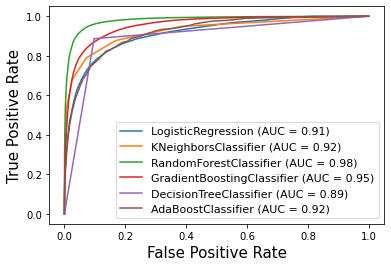

In [137]:
disp=plot_roc_curve(lr,X_test,y_test)

plot_roc_curve(knc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(abc,X_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')

<font color ='red'>
    
- **AUC is maximum for Random Forest Classifier, which confirms that it is the best performing model for given data**

### Tuning the HyperParameters of best performing model.

In [103]:
## Importing the GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

In [104]:
rf_grid={'criterion':['gini','entropy'],
         'min_samples_split':[2,4,6],
         'min_samples_leaf':[1,3,5],
         'n_estimators':[80,100]}

In [105]:
gridCV=GridSearchCV(rfc,param_grid=rf_grid,n_jobs=-1)

In [106]:
gridCV.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [80, 100]})

In [107]:
## Printing the best parameters
gridCV.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [108]:
## Instantiating the rfc model with best parameters

rfc_best=RandomForestClassifier(criterion='entropy',min_samples_split=2,min_samples_leaf=1,n_estimators=100)

In [109]:
## Training the best model

rfc_best.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [110]:
## Predicting the output for test data using best model 

y_best=rfc_best.predict(X_test)

In [111]:
## Printing the accuracy score for best model
best_score=accuracy_score(y_test,y_best)
best_score

0.9403636706904079

In [112]:
## Printing the cross validation score for best model

best_cvs=cross_val_score(rfc_best,X_scaled,y_sm,cv=3).mean()
best_cvs

0.9341655677316735

In [113]:
## Printing the confusion matrix for best model

print(confusion_matrix(y_test,y_best))

[[39587  2711]
 [ 2343 40106]]


In [114]:
## Printing the classification report for best model

print(classification_report(y_test,y_best))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     42298
           1       0.94      0.94      0.94     42449

    accuracy                           0.94     84747
   macro avg       0.94      0.94      0.94     84747
weighted avg       0.94      0.94      0.94     84747



In [115]:
## Printing the f1-score for best model

best_f1=f1_score(y_test,y_best)
best_f1

0.9407266671357869

#### Storing the performance metrics of the best model in a dataframe

In [116]:
best_metrics=pd.DataFrame()
best_metrics['Model']=['RandomForest Classifier_Best']
best_metrics['Accuracy Score']=[best_score]
best_metrics['Cross Val Score']=[best_cvs]
best_metrics['f1 Score']=[best_f1]

best_metrics

Model  Accuracy Score  Cross Val Score  f1 Score
0  RandomForest Classifier_Best  0.940364        0.934166         0.940727

#### Printing the roc_auc curve for the best model

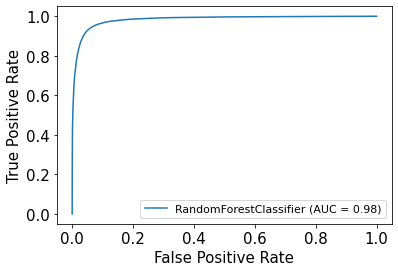

In [119]:
parameters = {'ytick.labelsize': 15,
                  'xtick.labelsize': 15,'font.size': 15.0}
plt.rcParams.update(parameters)


disp=plot_roc_curve(rfc_best,X_test,y_test)

plt.legend(prop={'size':11},loc='lower right')

## Saving the best performing model

In [ ]:
## Saving the best model
import pickle
filename='CreditDefaulter_rfc.pkl'
pickle.dump(rfc_best,open(filename,'wb'))